# Team 10's K-Means assignment.
Team member:
- Xin Feng
- Fahimeh Gholami
- Mu Zhao

## Part 1: Familiarization and Basic Testing with the k-Means Algorithm

### 1.1 Dataset Selection
- We have chosen the Mushroom Classification dataset from [Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification).
- This dataset consists of 23 columns: 1 target column and 22 feature columns, all of which are categorical.
- We chose this dataset because we applied it in KNN assignment, therefore it can be eaiser for us to compare the performance and rusult between 2 models.

In [296]:
# import the libraries
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#### Data cleaning

In [297]:
# load the data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1IAg-u0DClx6F5WucEyycuU75EN0BvGBs")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [298]:
# Check null, passed.
print("Null value check:")
# Drop the unnecessary columns and rows.
df = df[['culmen_length_mm', 'culmen_depth_mm', 'species']]
df = df.dropna()
print(df.isnull().sum())
# Get basic statistic, passed.
print("\nBasic statistic:")

Null value check:
culmen_length_mm    0
culmen_depth_mm     0
species             0
dtype: int64

Basic statistic:


#### We visualize the data first.

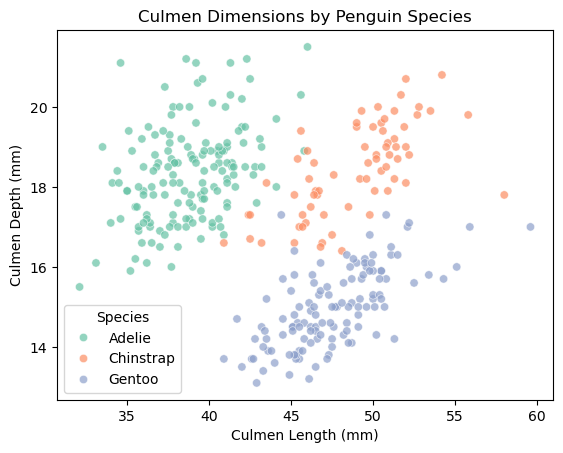

In [299]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='species',
palette='Set2', alpha=0.7)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Culmen Dimensions by Penguin Species')
plt.legend(title='Species')
plt.show()

#### We deleted the class feature

In [300]:
df = df.drop(columns=['species'])

### 1.2 Algorithm Application

#### We tried to group the data into 3 clusters and predict cluster assignments.

In [301]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)

#### Verify Cluster Assignments

We have successfully completed the clustering process, and for the most part, the results demonstrate good performance. The majority of the data points were correctly grouped into clusters that align well with the expected penguin species. However, there is a small portion of the data that shows inconsistencies or errors in the cluster assignments.

In [302]:
yp[300:340]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int32)

#### Scale the variables

We tried to scale the data to get better results.

In [303]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=['culmen_length_mm', 'culmen_depth_mm'])
print(df.head())

   culmen_length_mm  culmen_depth_mm
0          0.254545         0.666667
1          0.269091         0.511905
2          0.298182         0.583333
3          0.167273         0.738095
4          0.261818         0.892857


#### We re-apply the clustering

Obviously, we got better results.

In [304]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
df['cluster'] = yp
yp[300:340]


array([2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

#### Re-visualize the data.

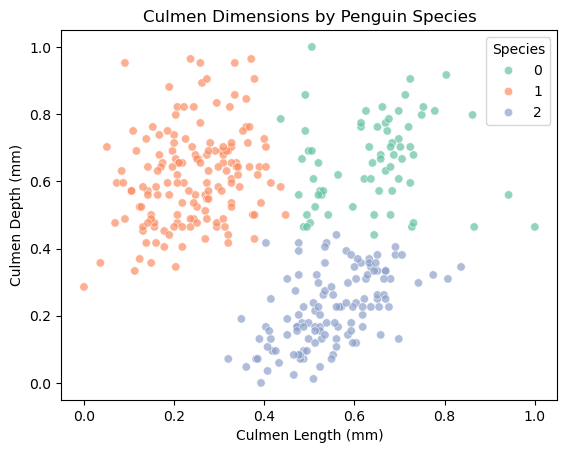

In [305]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='cluster',
palette='Set2', alpha=0.7)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Culmen Dimensions by Penguin Species')
plt.legend(title='Species')
plt.show()

#### Visualize Clusters with Normalized Data

In [306]:

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

Text(0.5, 1.0, 'K-Means Clustering')

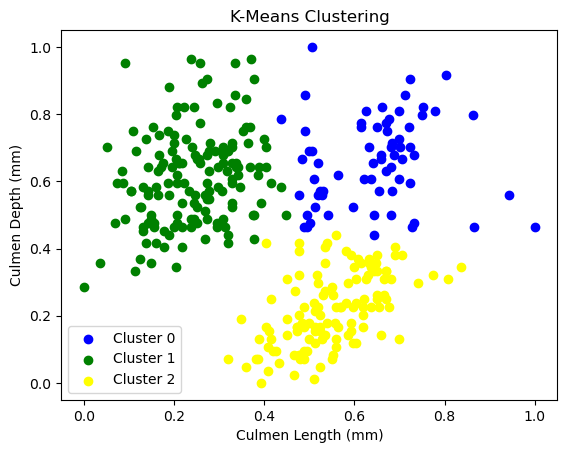

In [307]:
plt.scatter(df1['culmen_length_mm'], df1['culmen_depth_mm'], color='blue', label='Cluster 0')
plt.scatter(df2['culmen_length_mm'], df2['culmen_depth_mm'], color='green', label='Cluster 1')
plt.scatter(df3['culmen_length_mm'], df3['culmen_depth_mm'], color='yellow', label='Cluster 2')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.legend()
plt.title('K-Means Clustering')

### 1.3 Use Cases



We can apply the K-Means algorithm in a CRM system to segment clients into different groups based on their behavior and preferences. This segmentation allows us to develop products and services more effectively to meet the specific needs of each client group.

Additionally, the K-Means algorithm can be applied to analyze social media data, enabling us to identify different user groups based on their engagement patterns, interests. By understanding these groups, we can design more targeted marketing campaigns and improve overall user engagement.

## 2 In-Depth Experimentation with the k-Means Algorithm

### Parameter Tuning

We applied different `k` and the elbow method to find the best `k`.

The graph below represents the Sum of Squared Errors (SSE) plotted against different values of K .
   - From K=1 to K=3, the SSE decreases sharply.
   - After K=3, the rate of SSE reduction slows down considerably.
   - The "elbow" suggests that K=3 is the **optimal number of clusters**, as adding more clusters beyond this point results in diminishing returns in terms of SSE improvement.

In [308]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal K')

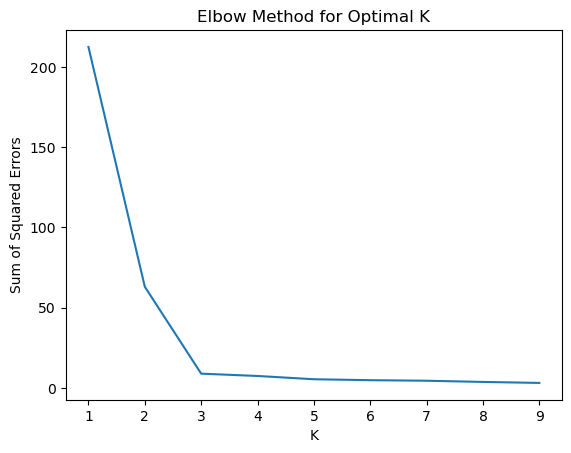

In [309]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng, sse)
plt.title('Elbow Method for Optimal K')